# Customer Churn Survival Analysis Report

**Author:** Viktoria Melkumyan  
**Course:** Homework 3 : Survival Analysis  
**Description:** This notebook presents the analysis of customer churn using survival analysis, calculates customer lifetime value (CLV), and identifies at-risk customers for retention strategies.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
from PIL import Image
from IPython.display import display

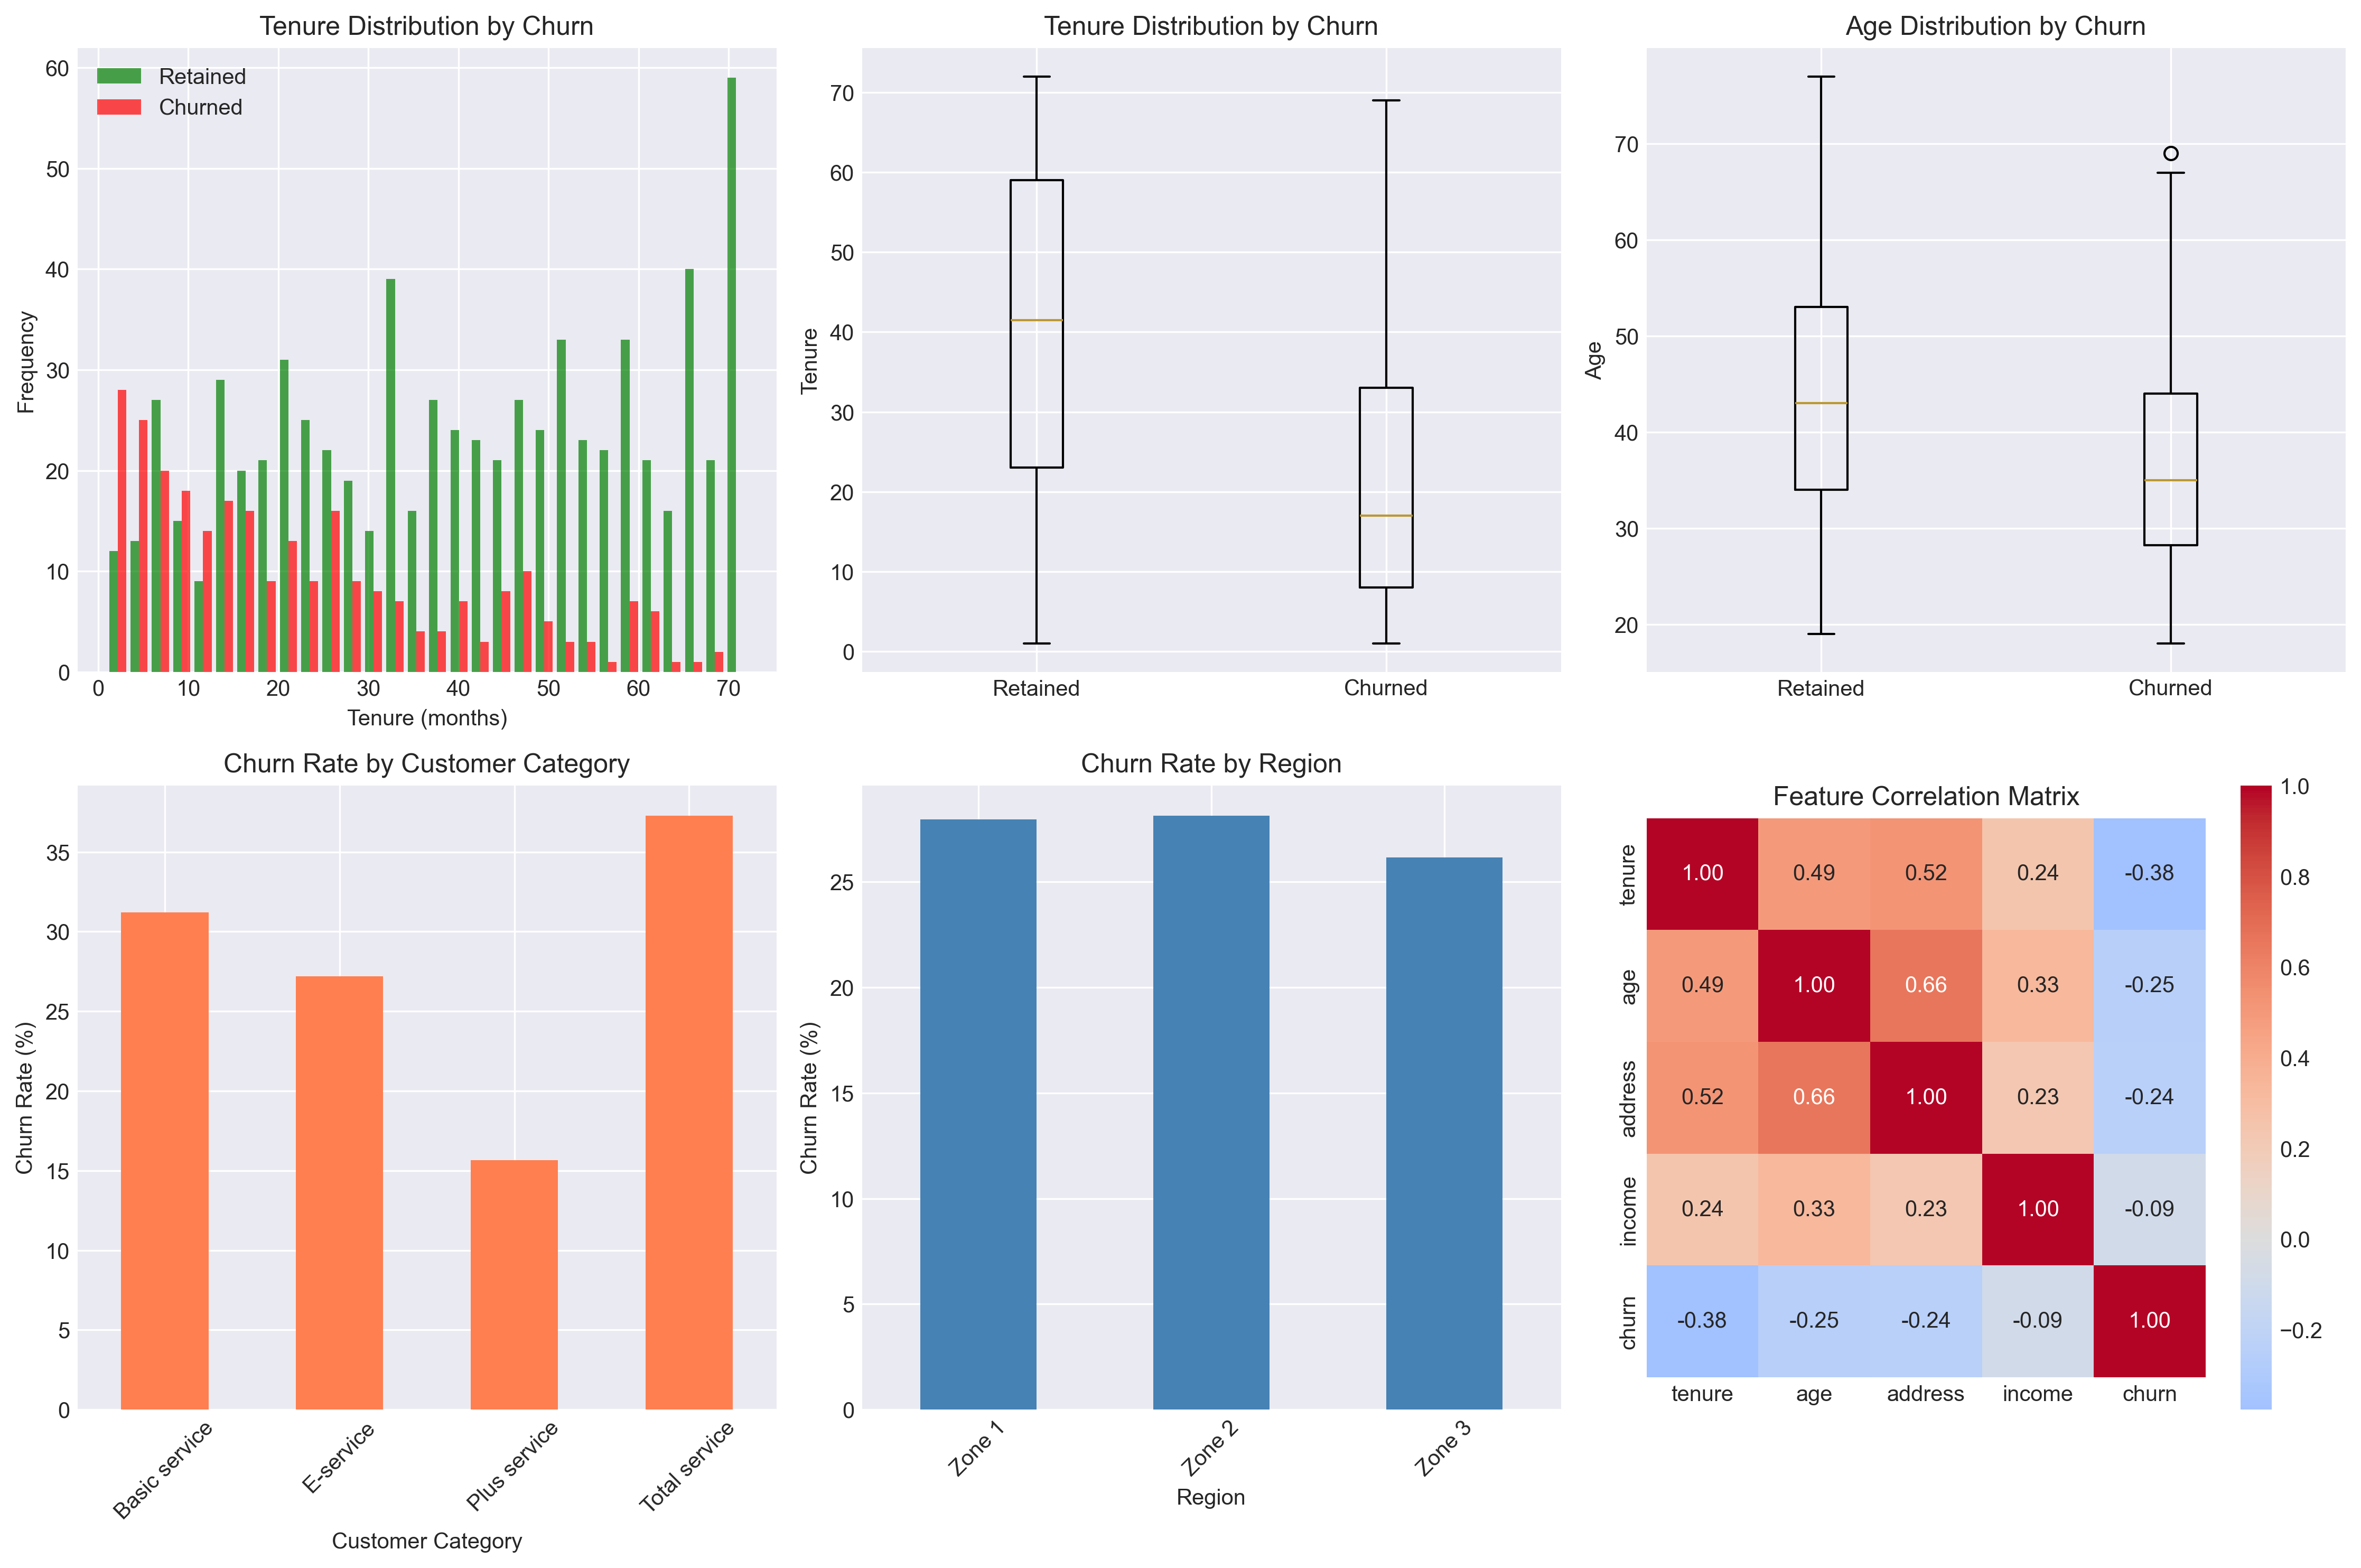

In [ ]:
image_path = '/Users/macbook/Documents/AUA/DS223/HW3/outputs/eda_analysis.png' 

try:
    img = Image.open(image_path)
    display(img)
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In the above figure we observe that churned and retained customers have completely different tenure distribution shapes, with churned customers having small lifetime and retained ones having high lifetime. The difference can be observed from the boxplot as well where retained customers have significantly high median lifetime than churned ones. There is an about 10 year gap in the median ages of those two groups, with retained group having elder customers. Customers from Total Service category showcase the highest churn percentage (37%), while plus service category has the lowest churn rate wiht only 15%. Churn rates do not significantly differ by regions. While there is a high correlation between address and age, those 2 features are not correlated in general, thus this doesn't convey an important meaning.

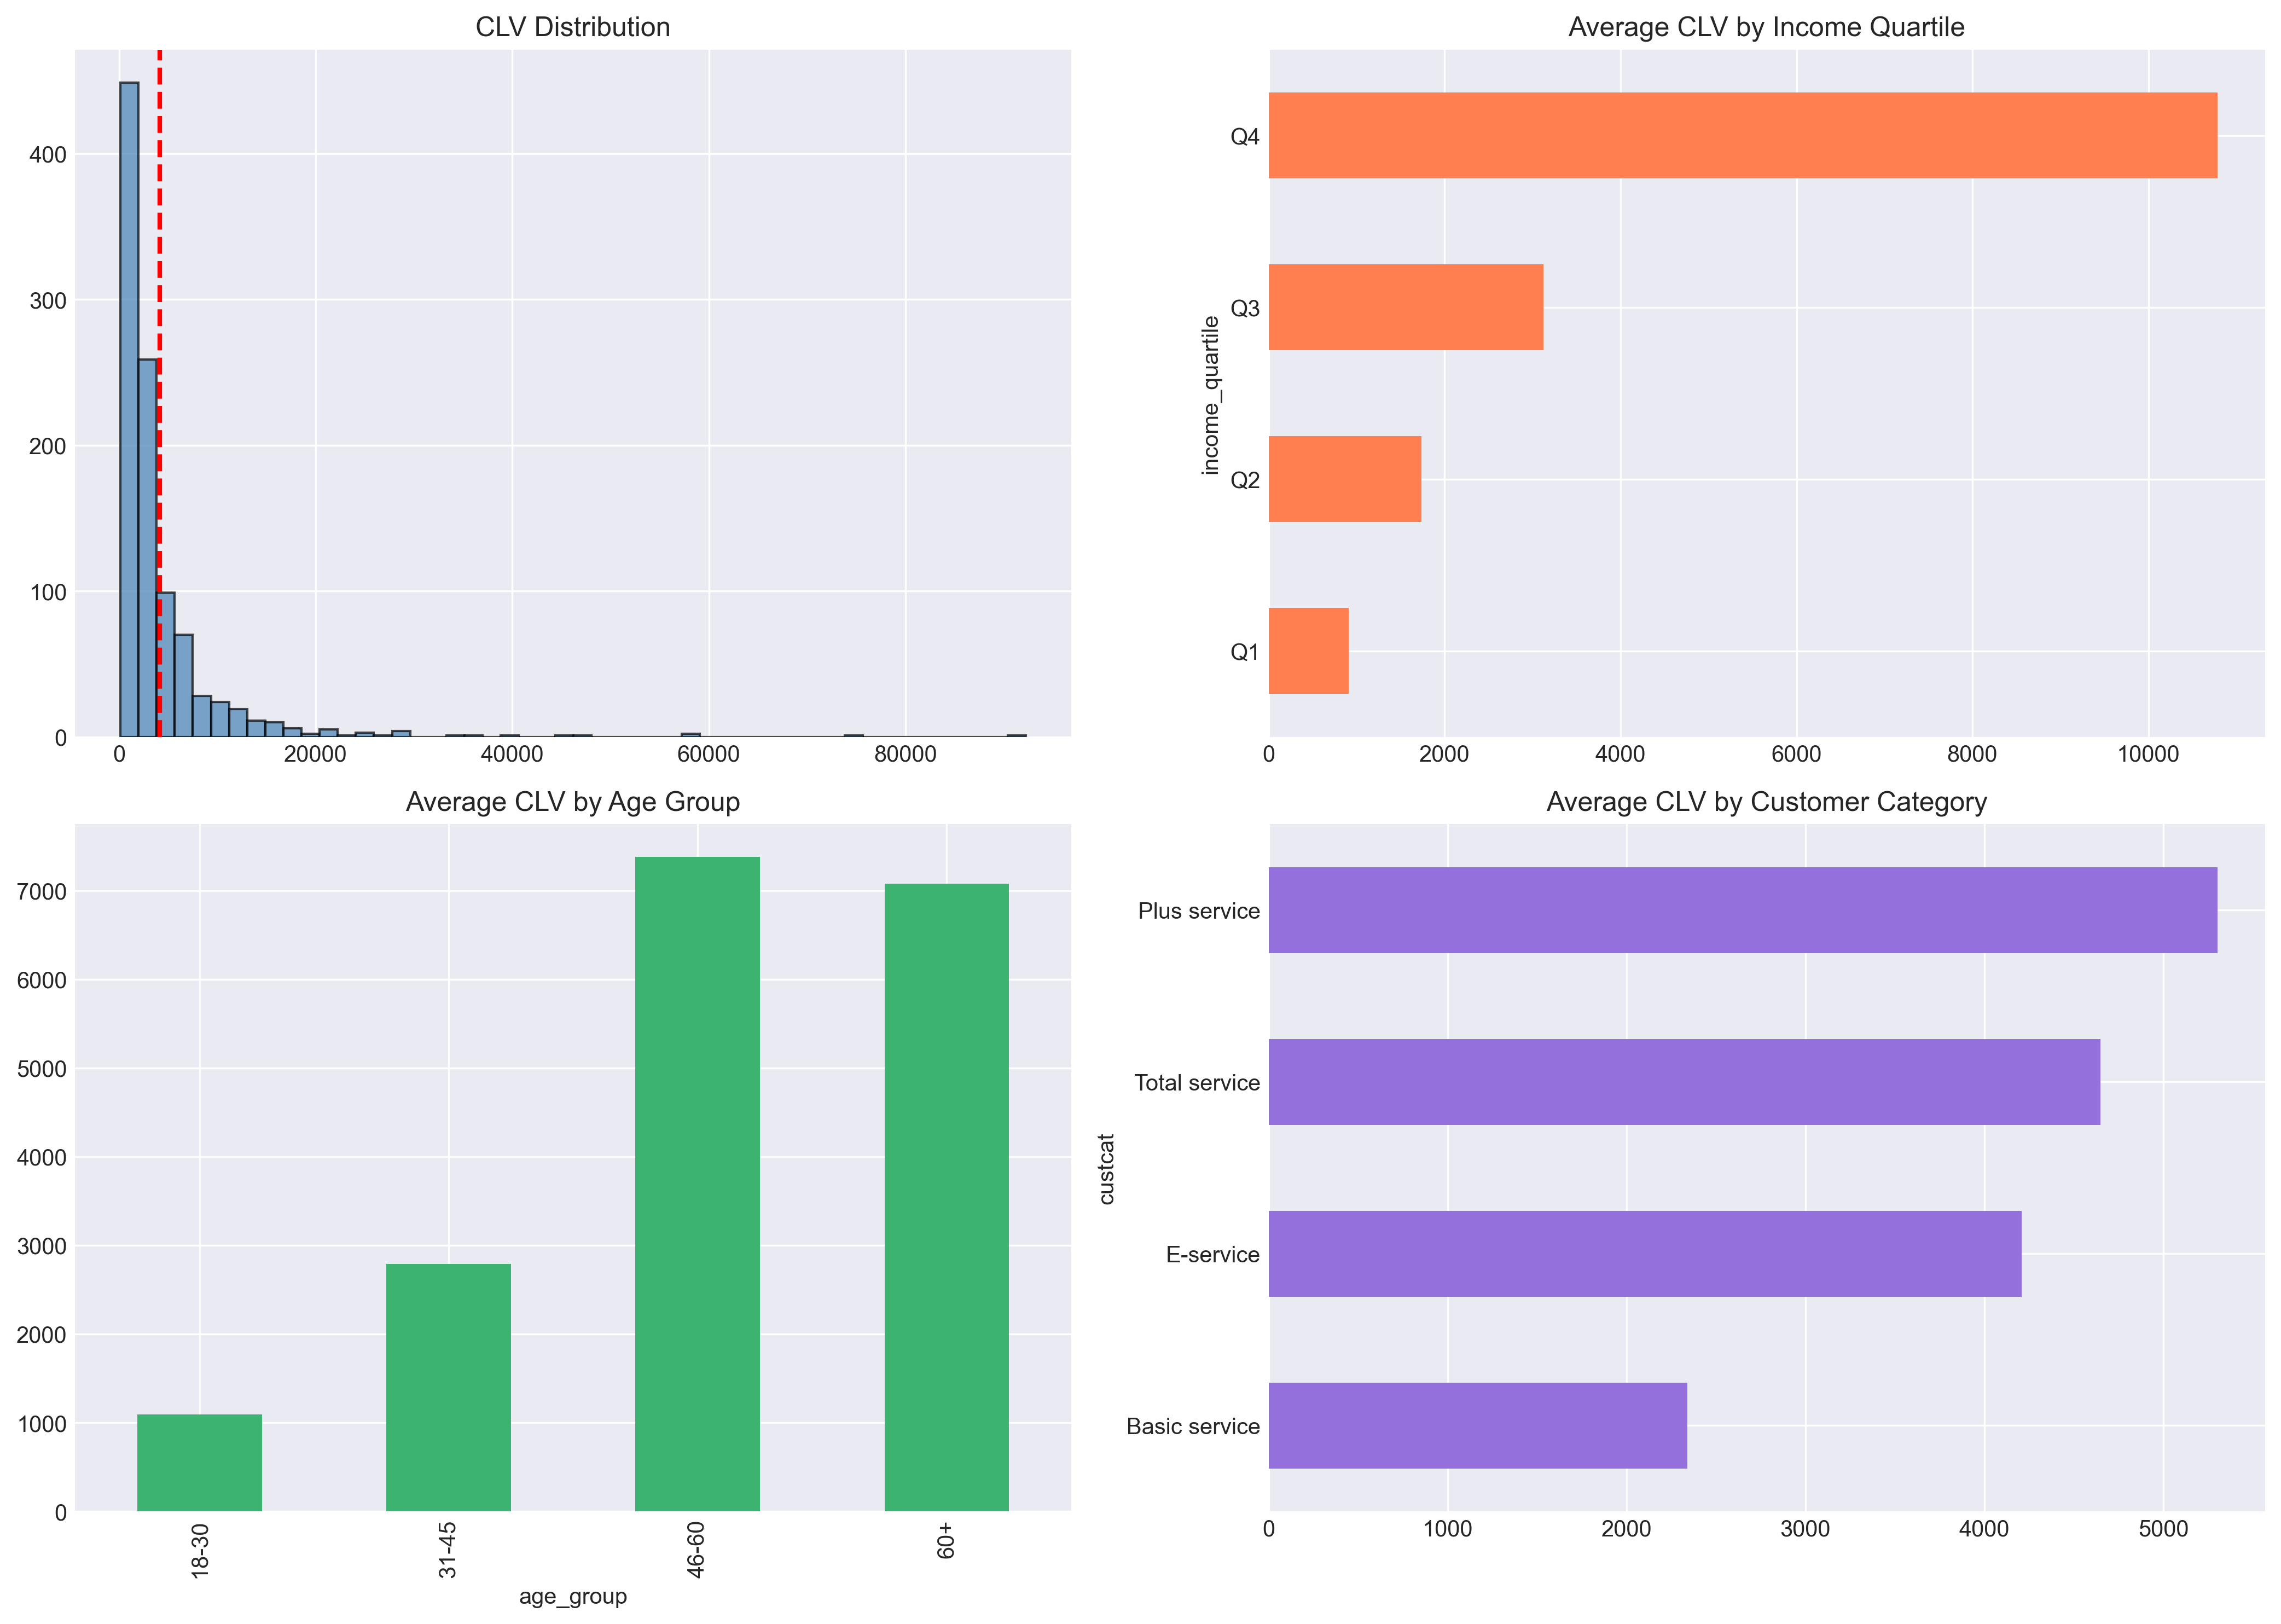

In [ ]:
image_path = '/Users/macbook/Documents/AUA/DS223/HW3/outputs/clv_segment_analysis.png' 

try:
    img = Image.open(image_path)
    display(img)
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

CLV has right skewed distribution with an immense part of values concentrated near small values. There are some customers with extremely high lifetime value. From Q1 to Q4 of Income, the CLV increases, especially for the last quartiles, meaning that people with high income on average have higher CLV than those with lower income. Age group 46-60 has the highest CLV, while 18-30 have the lowest. Additionally, customers from plus service have highest average CLV together with lowest churn rate (from the previous EDA).

Valuable customers segments are the ones with high average CLV, thus we can say that customers with high income present a high value to the company.

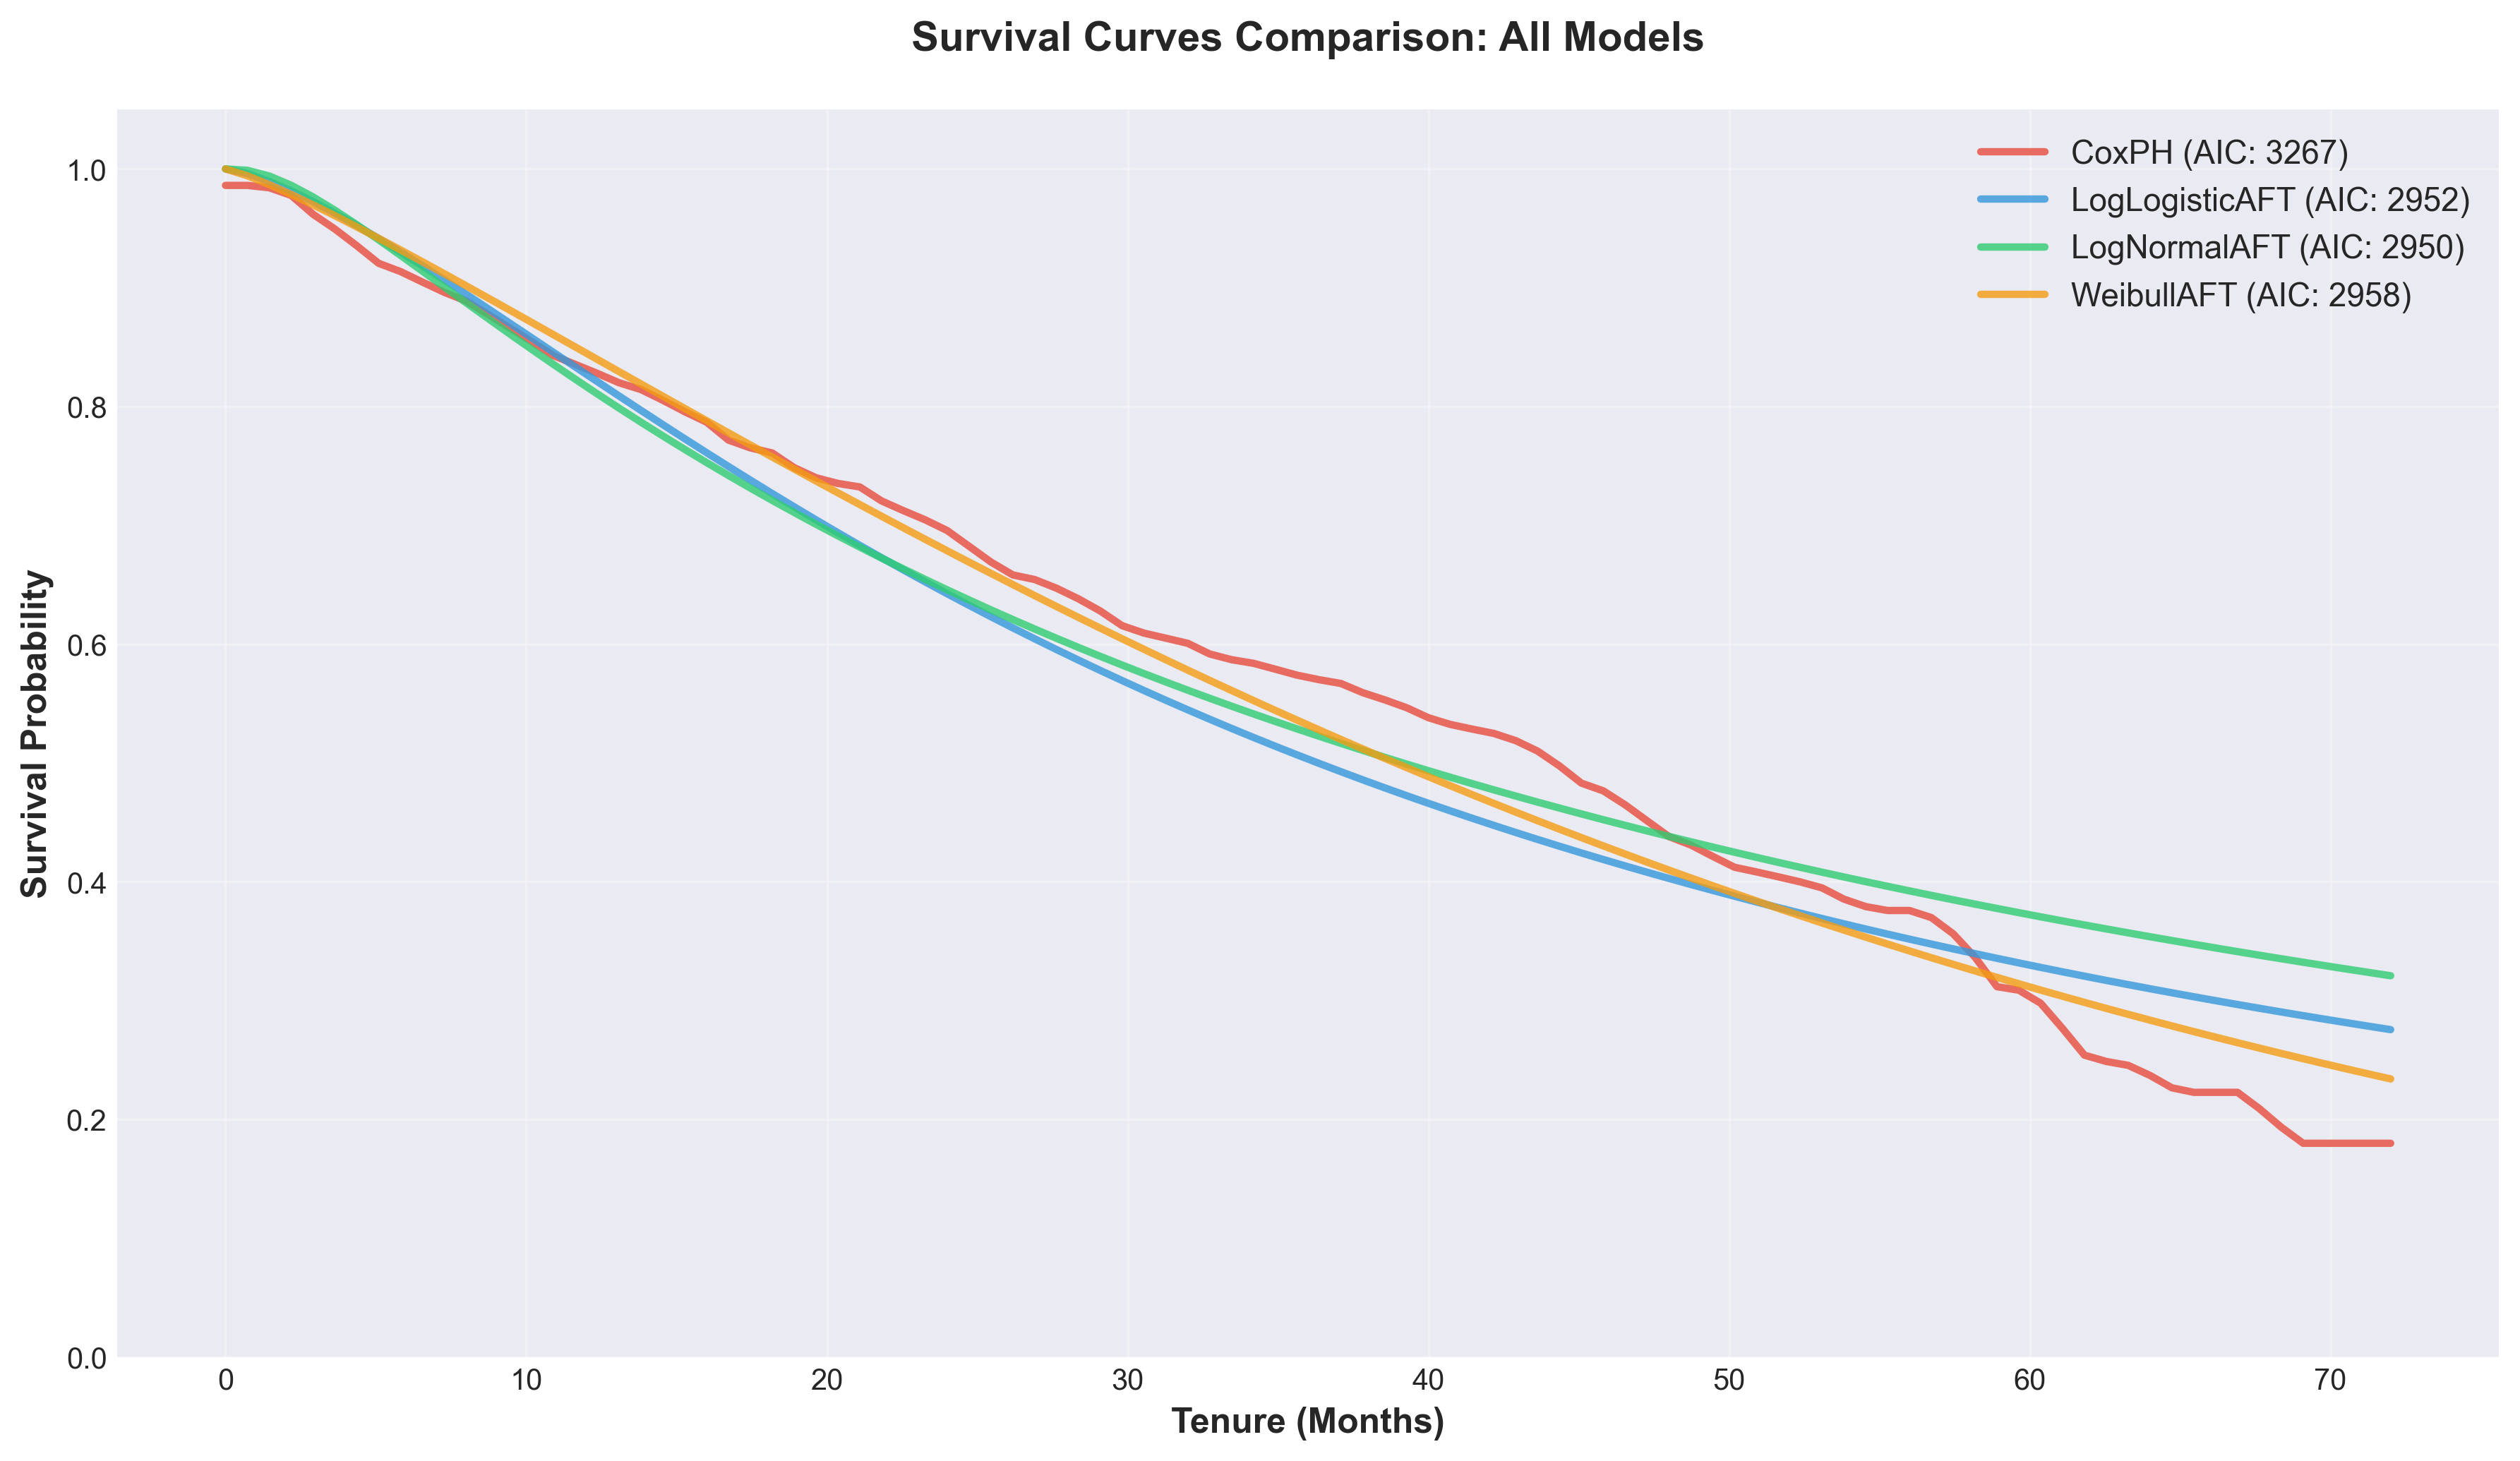

In [19]:
image_path = '/Users/macbook/Documents/AUA/DS223/HW3/outputs/survival_curves_comparison.png' 

try:
    img = Image.open(image_path)
    display(img)
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

I fitted multiple parametric survival models (Weibull, Lognormal, Loglogistic, CoxPH) to predict customer churn. Based on AIC, BIC, and concordance index, the LogNormal AFT model provided the best fit.
I would choose the LogNormal AFT model because it provides interpretable coefficients and directly estimates survival probabilities over time, making it easy to identify at-risk customers and calculate CLV. 

The LogNormal AFT model shows how each feature affects customer tenure on a multiplicative scale. <br> 
Positive mu_ coeficients: <br>
age (0.037), <br> address (0.043), <br>customer categories E-service (1.024),<br> Plus service (0.832),<br>  Total service (1.018)<br>indicate that higher values or membership in these categories increase expected tenure, meaning these customers tend to stay longer. <br>Negative coefficients: <br>internet (-0.857),<br> voice (-0.442), <br> marital_Unmarried (-0.436) <br> imply shorter expected tenure for those with internet or voice plans and unmarried customers.<br> The intercept (2.734) represents the baseline log-tenure for a reference customer, while sigma_ (0.277) reflects the variability of log-tenure;<br> a lower sigma indicates predicted tenures are clustered more closely around the expected value.<br> Overall, customer category has the strongest positive effect, whereas internet access has the strongest negative effect on tenure.

In [32]:
at_risk_customers = pd.read_csv("/Users/macbook/Documents/AUA/DS223/HW3/outputs/at_risk_customers.csv")
expected_total_clv = at_risk_customers['CLV'].sum()
print(f'Total sum of CLVs of at risk customers is {expected_total_clv}, which is what we may lose if we do not take any action to retain them.')
n_of_at_risk_customers = at_risk_customers.shape[0]
print(f'The number of at risk customers is {n_of_at_risk_customers}')

Total sum of CLVs of at risk customers is 60967.65061404459, which is what we may lose if we do not take any action to retain them.
The number of at risk customers is 77


In [37]:
at_risk_customers.columns

Index(['customer_id', 'survival_prob_1yr', 'CLV', 'tenure', 'income',
       'custcat'],
      dtype='object')

The annual retention budget is calculated as 10% of the total CLV of customers identified as at-risk, i.e., those with a 1-year survival probability below 0.7, resulting in $6,096.77 for this population. <br>
This has been calculated in survival_analysis.py. <br> To improve retention, the company should focus on targeted campaigns for these high-CLV, at-risk segments, offer incentives or value-added services, address underlying service issues, and use predictive monitoring to continuously identify and engage customers most likely to churn.